<a href="https://colab.research.google.com/github/ClaudixoPG/ESI_2025_S1/blob/main/notebooks/Visualizaciones_UX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización UX (corregida): solo USE + Experiencia

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar archivo corregido
url = "https://raw.githubusercontent.com/ClaudixoPG/ESI_2025_S1/main/datasets/Encuesta_UX_Simulada.xlsx"
df = pd.read_excel(url)
df.head()

,ID,Usabilidad_SUS,Utilidad_USE,Facilidad_Uso_USE,Aprendizaje_USE,Satisfaccion_USE,Claridad_UEQ,Estetica_UEQ,Atractivo_UEQ,Experiencia
0,1,77.0,4.82,3.87,5.14,5.25,5.79,4.64,6.84,Buena
1,2,70.6,6.35,2.82,4.87,6.22,5.81,3.69,6.62,Buena
2,3,78.5,4.67,4.02,4.58,5.99,4.44,3.63,3.78,Regular
3,4,87.2,6.77,3.42,5.68,6.45,4.17,4.00,3.28,Regular
4,5,69.7,6.28,3.87,5.86,6.01,6.24,5.20,3.40,Regular


## Gráfico de barras: Promedio por dimensión USE

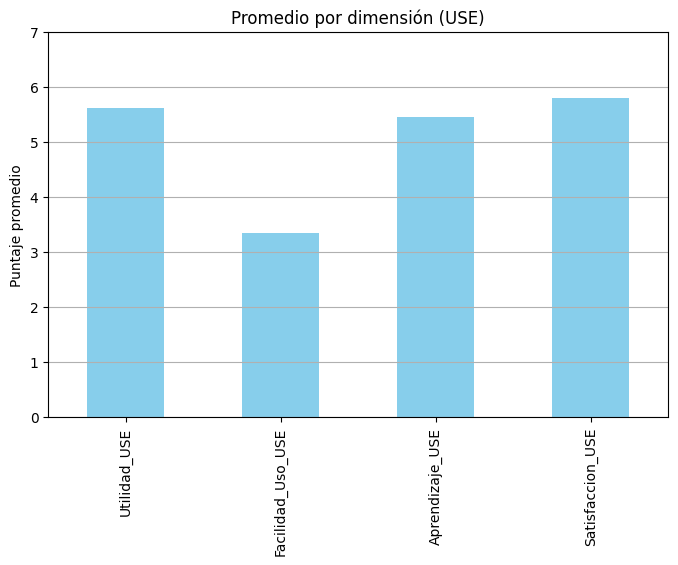

In [22]:
use_dims = ['Utilidad_USE', 'Facilidad_Uso_USE', 'Aprendizaje_USE', 'Satisfaccion_USE']
means = df[use_dims].mean()

plt.figure(figsize=(8,5))
means.plot(kind='bar', color='skyblue')
plt.title('Promedio por dimensión (USE)')
plt.ylabel('Puntaje promedio')
plt.ylim(0, 7)
plt.grid(axis='y')
plt.show()

## Gráfico de barras agrupadas: dimensiones USE por experiencia

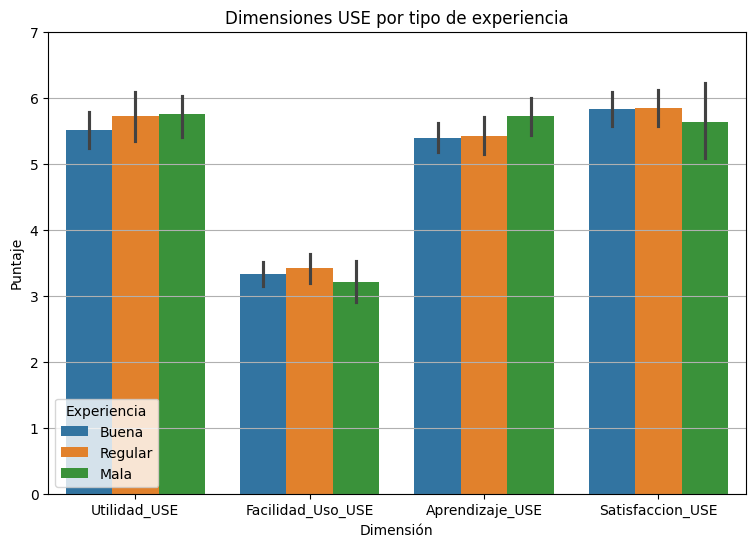

In [23]:
df_melted = df.melt(id_vars='Experiencia', value_vars=use_dims, var_name='Dimensión', value_name='Puntaje')

plt.figure(figsize=(9,6))
sns.barplot(data=df_melted, x='Dimensión', y='Puntaje', hue='Experiencia')
plt.title('Dimensiones USE por tipo de experiencia')
plt.ylim(0, 7)
plt.grid(axis='y')
plt.show()

## Gráfico de barras apiladas: distribución de experiencias

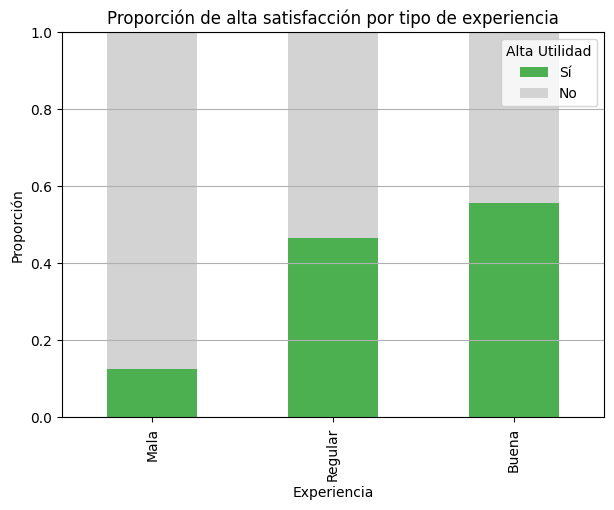

In [35]:
# Orden personalizado de categorías
orden_categorias = ['Mala', 'Regular', 'Buena']

# Crear columna booleana
df['Alta_Utilidad'] = df['Utilidad_USE'] > 5.5

# Conteo cruzado
conteo = df.groupby('Experiencia')['Alta_Utilidad'].value_counts().unstack().fillna(0)

# Reordenar índice
conteo = conteo.loc[orden_categorias]

# Calcular proporciones
proporciones = conteo.div(conteo.sum(axis=1), axis=0)

# Colores personalizados (No = gris claro, Sí = color llamativo)
colores = ['#4CAF50','lightgray']  # gris y verde fuerte

# Gráfico
proporciones.plot(kind='bar', stacked=True, color=colores, figsize=(7,5))
plt.title('Proporción de alta satisfacción por tipo de experiencia')
plt.ylabel('Proporción')
plt.xlabel('Experiencia')
plt.legend(title='Alta Utilidad', labels=['Sí', 'No'])
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


## Gráfico radar: Dimensiones USE (promedios)

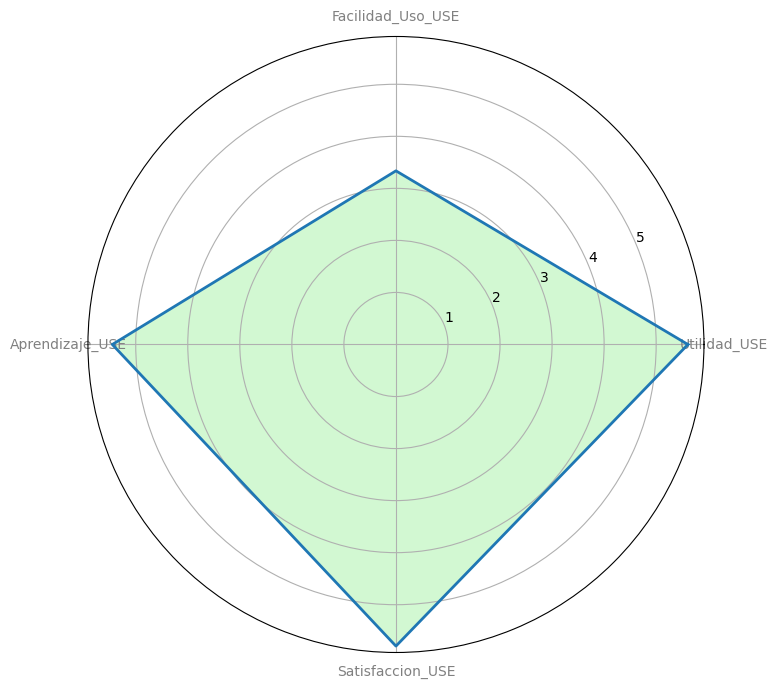

In [25]:
from math import pi

# Promedios
labels = use_dims
values = df[labels].mean().tolist()
values += values[:1]

# Ángulos
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

# Plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels, color='grey', size=10)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'lightgreen', alpha=0.4)
#plt.title('Perfil promedio (dimensiones USE)')
plt.show()